In [ ]:
import json
from collections import defaultdict
import pandas as pd

# Load JSON files
with open("/fs/ess/PAS2136/ggr_data/results/D2/lca_output_fixed/final_fs_output_LCA_left_split_verified_time_verified.json", "r") as f:
    left_data = json.load(f)

with open("/fs/ess/PAS2136/ggr_data/results/D2/lca_output_fixed/final_fs_output_LCA_right_split_verified_time_verified.json", "r") as f:
    right_data = json.load(f)


# Combine annotations
all_annotations = left_data["annotations"]["annotations"] + right_data["annotations"]["annotations"]

# Convert to DataFrame
df = pd.DataFrame(all_annotations)

# Group by viewpoint and count unique clustering IDs and tracking IDs
summary_df = (
    df.groupby("viewpoint")
    .agg(
        num_clusters=pd.NamedAgg(column="LCA_clustering_id", aggfunc=lambda x: len(set(x))),
        num_tracking_ids=pd.NamedAgg(column="tracking_id", aggfunc=lambda x: len(set(x)))
    )
    .reset_index()
)

# Display the result
print(summary_df)

TypeError: list indices must be integers or slices, not str

In [20]:
import json
from collections import defaultdict
import pandas as pd

# Load JSON files
with open("/fs/ess/PAS2136/ggr_data/results/D2/lca_output_fixed/final_fs_output_LCA_left.json", "r") as f:
    left_data = json.load(f)

with open("/fs/ess/PAS2136/ggr_data/results/D2/lca_output_fixed/final_fs_output_LCA_right.json", "r") as f:
    right_data = json.load(f)


# Combine annotations
all_annotations = left_data["annotations"] + right_data["annotations"]

# Convert to DataFrame
df = pd.DataFrame(all_annotations)

# Group by viewpoint and count unique clustering IDs and tracking IDs
summary_df = (
    df.groupby("viewpoint")
    .agg(
        num_clusters=pd.NamedAgg(column="LCA_clustering_id", aggfunc=lambda x: len(set(x))),
        num_tracking_ids=pd.NamedAgg(column="tracking_id", aggfunc=lambda x: len(set(x)))
    )
    .reset_index()
)

# Display the result
print(summary_df)

  viewpoint  num_clusters  num_tracking_ids
0      left             5                10
1     right             7                10


In [21]:
df.sample()

uuid                            image_uuid  \
9  4bc2497a-cf6a-4f72-a547-bbedcb58affe  e19b9eec-39d4-ce74-a2e0-bb0a77316b37   

                                                bbox  confidence  \
9  [2913.551513671875, 1637.92724609375, 277.6401...    0.876095   

   detection_class  tracking_id  category_id viewpoint  CA_score  \
9               22           10            0      left  0.443406   

   individual_id LCA_clustering_id  
9              0                 2

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Map image_uuid to image_path
def get_image_path_mapping(data):
    return {img['image_uuid']: img['image_path'] for img in data['images']}

image_path_map = {
    **get_image_path_mapping(left_data),
    **get_image_path_mapping(right_data)
}

# Add image_path column
df['image_path'] = df['image_uuid'].map(image_path_map)

# Summary statistics per viewpoint
summary_df = (
    df.groupby("viewpoint")
    .agg(
        num_clusters=pd.NamedAgg(column="LCA_clustering_id", aggfunc=lambda x: len(set(x))),
        num_tracking_ids=pd.NamedAgg(column="tracking_id", aggfunc=lambda x: len(set(x)))
    )
    .reset_index()
)

print("Summary of clusters and tracking IDs per viewpoint:")
print(summary_df)

# Plot clusters with cropped bboxes
def plot_clusters(df, cluster_col='LCA_clustering_id', max_per_row=3):
    unique_clusters = df[cluster_col].unique()
    
    for cluster_id in unique_clusters:
        cluster_df = df[df[cluster_col] == cluster_id]
        num_images = len(cluster_df)
        num_rows = (num_images + max_per_row - 1) // max_per_row
        
        fig, axes = plt.subplots(num_rows, max_per_row, figsize=(5 * max_per_row, 5 * num_rows))
        axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
        fig.suptitle(f"Cluster: {cluster_id}", fontsize=16)
        
        for i, (_, row) in enumerate(cluster_df.iterrows()):
            img_path = row['image_path']
            bbox = row['bbox']
            try:
                img = mpimg.imread(img_path)
                x, y, w, h = map(int, bbox)
                cropped = img[y:y+h, x:x+w]
                axes[i].imshow(cropped)
                axes[i].set_title(f"Tracking ID: {row['tracking_id']}")
                axes[i].axis('off')
            except Exception as e:
                if i < len(axes):
                    axes[i].imshow(np.ones((100, 100, 3)))
                    axes[i].set_title("Image not found")
                    axes[i].axis('off')
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Plot all clusters per viewpoint
print("Left viewpoint clusters:")
plot_clusters(df[df['viewpoint'] == 'left'])
print("Right viewpoint clusters:")
plot_clusters(df[df['viewpoint'] == 'right'])

KeyError: 'image_uuid'

Summary of clusters and tracking IDs per viewpoint:
  viewpoint  num_clusters  num_tracking_ids
0      left             5                10
1     right             7                10


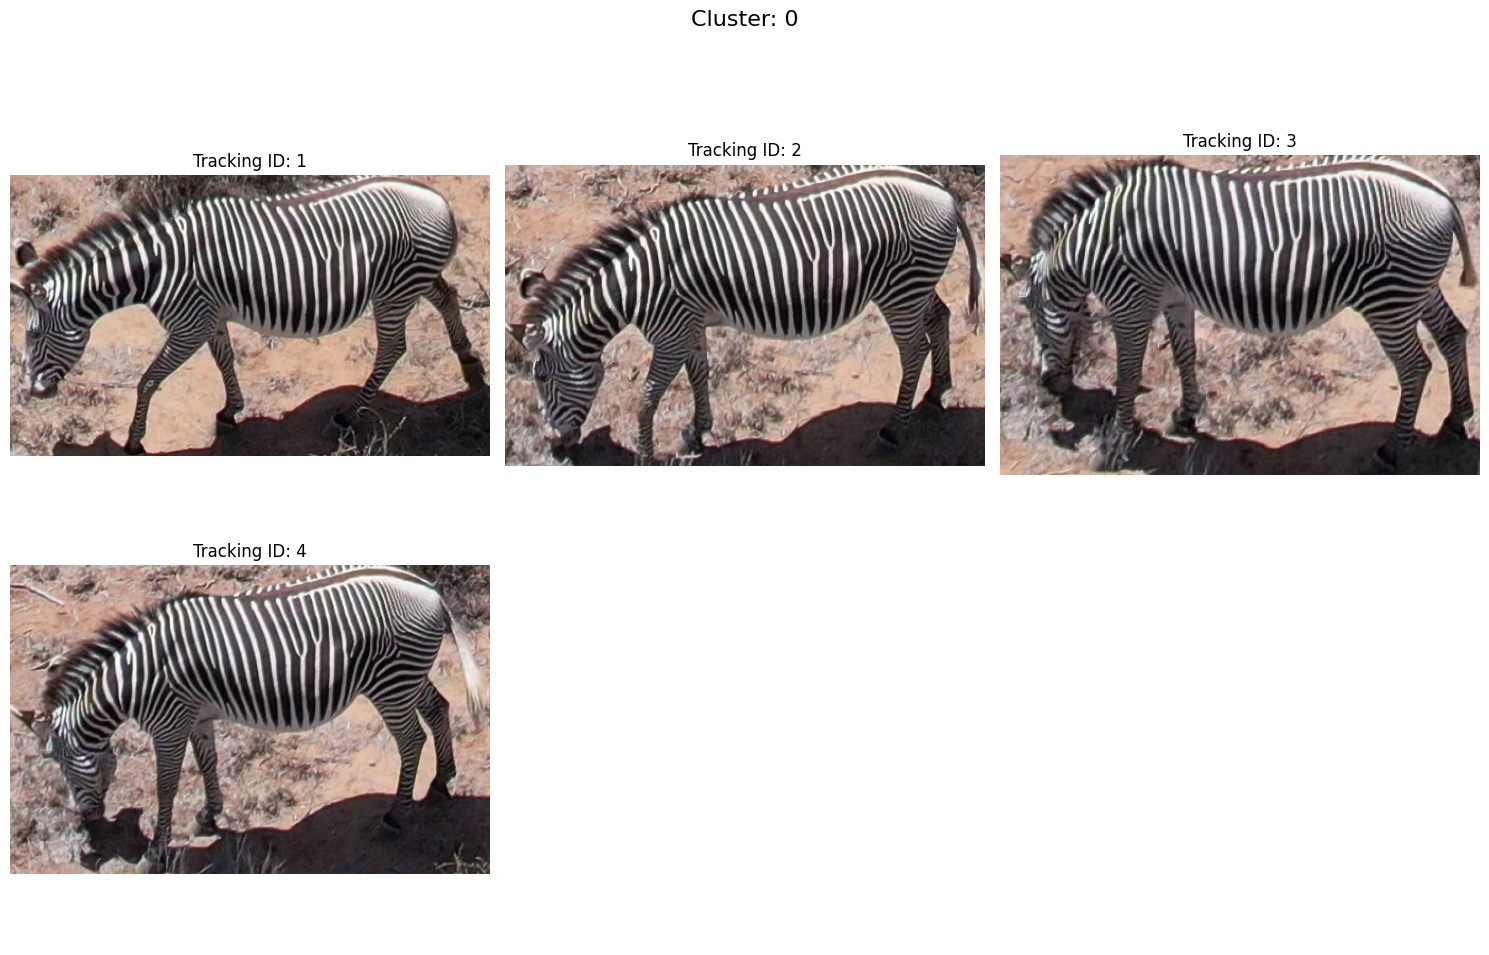

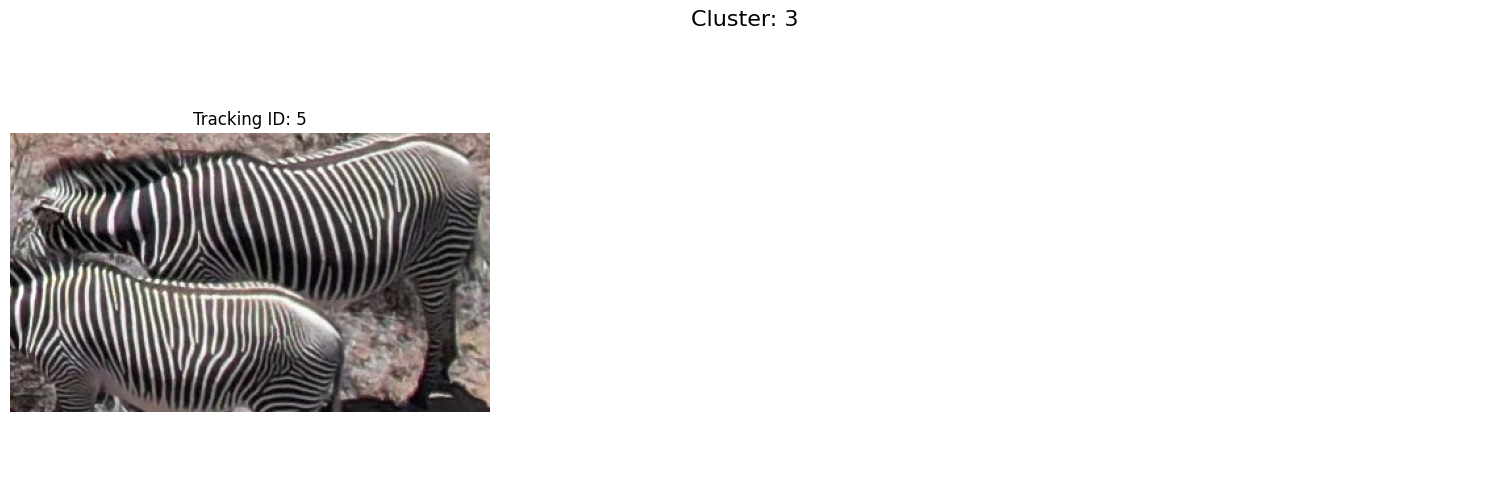

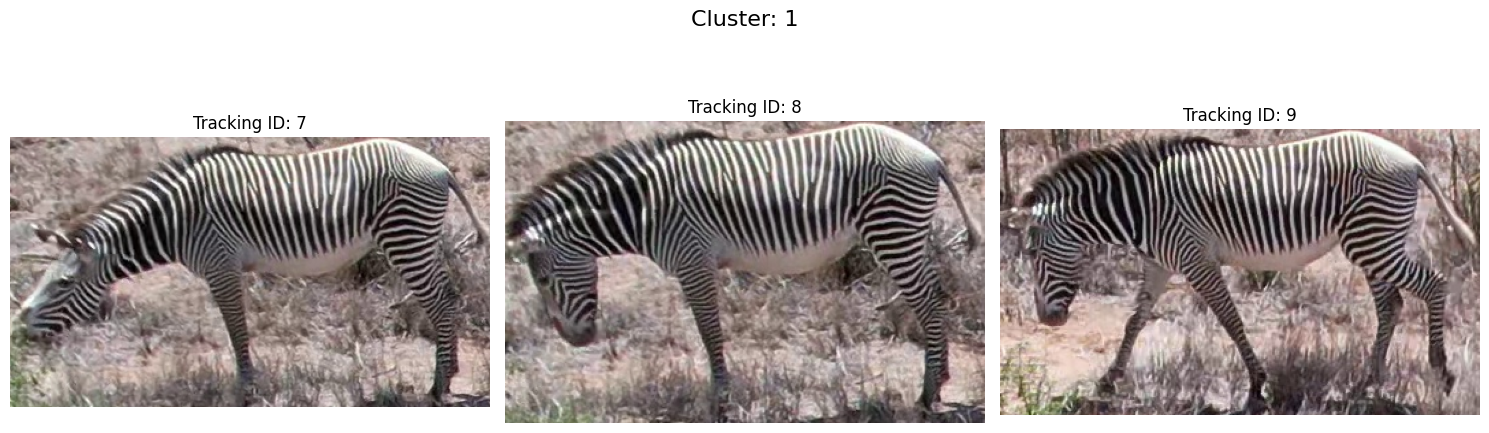

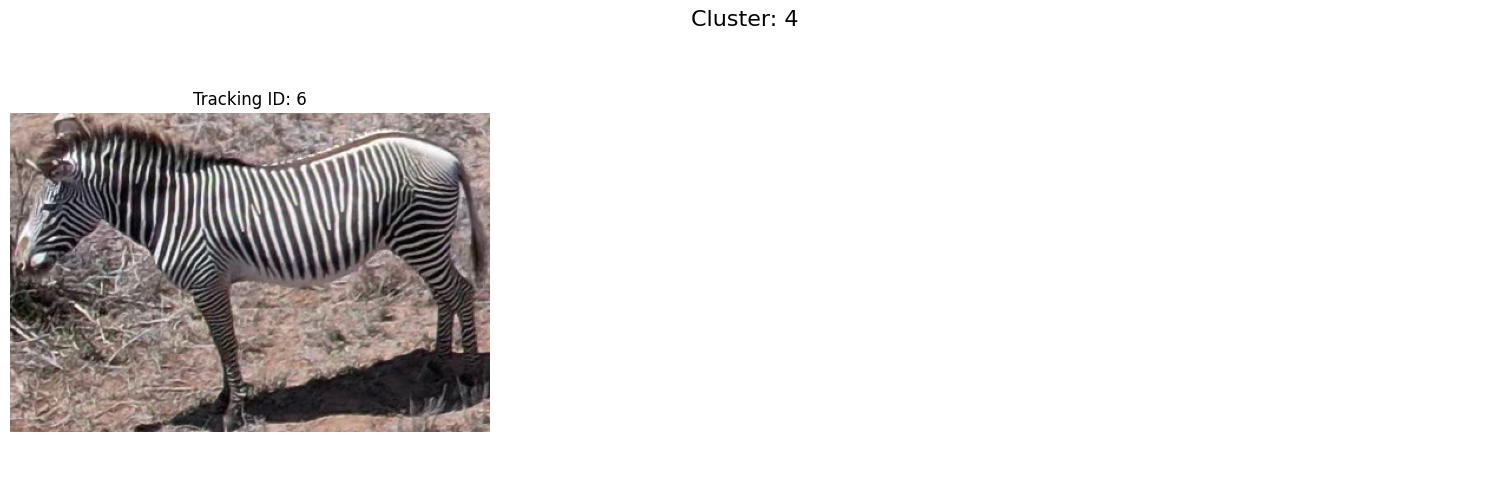

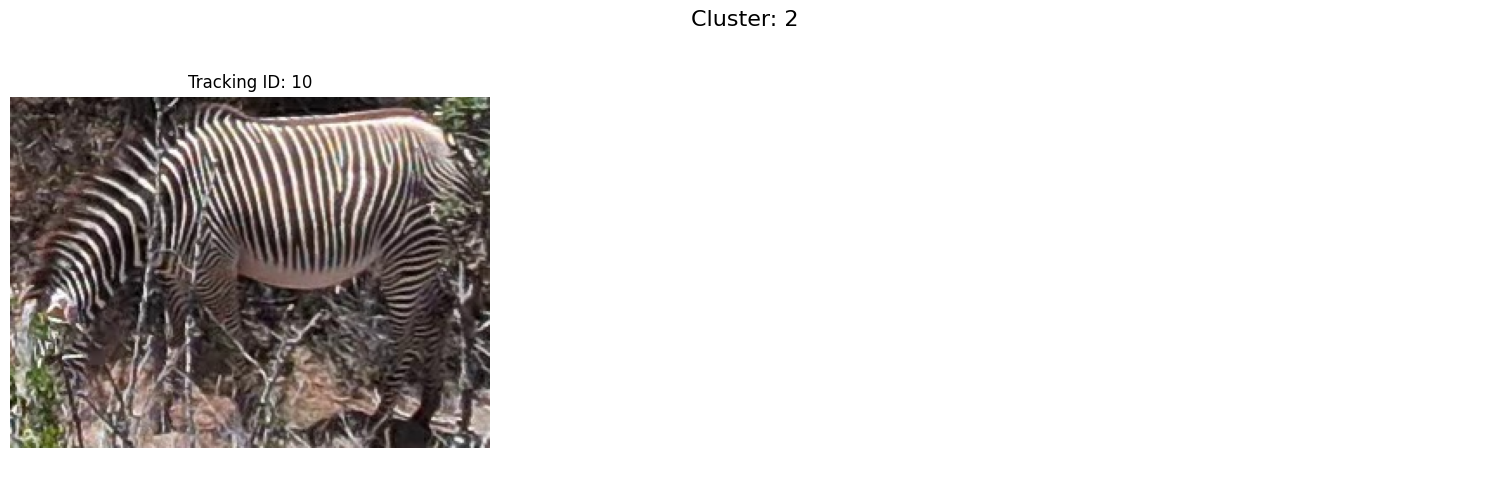

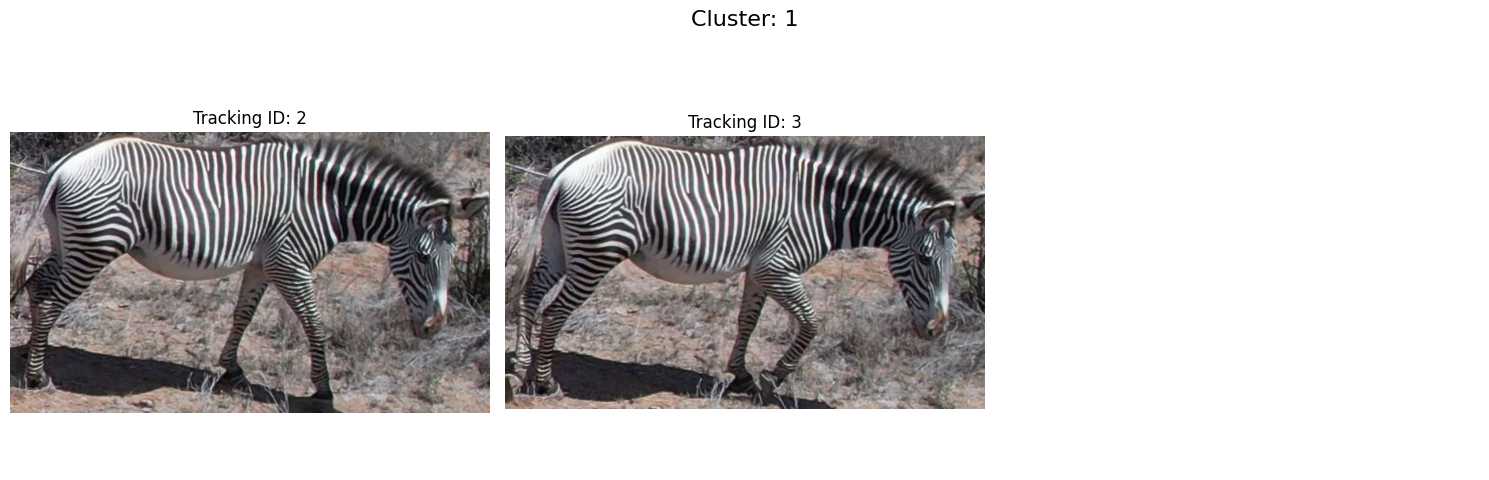

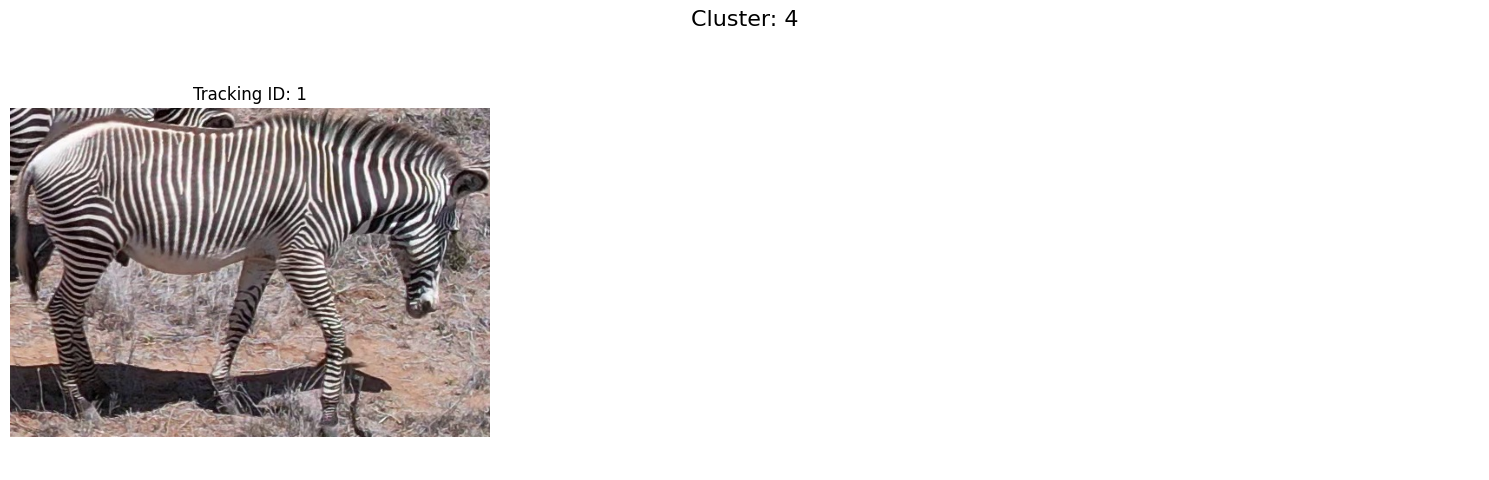

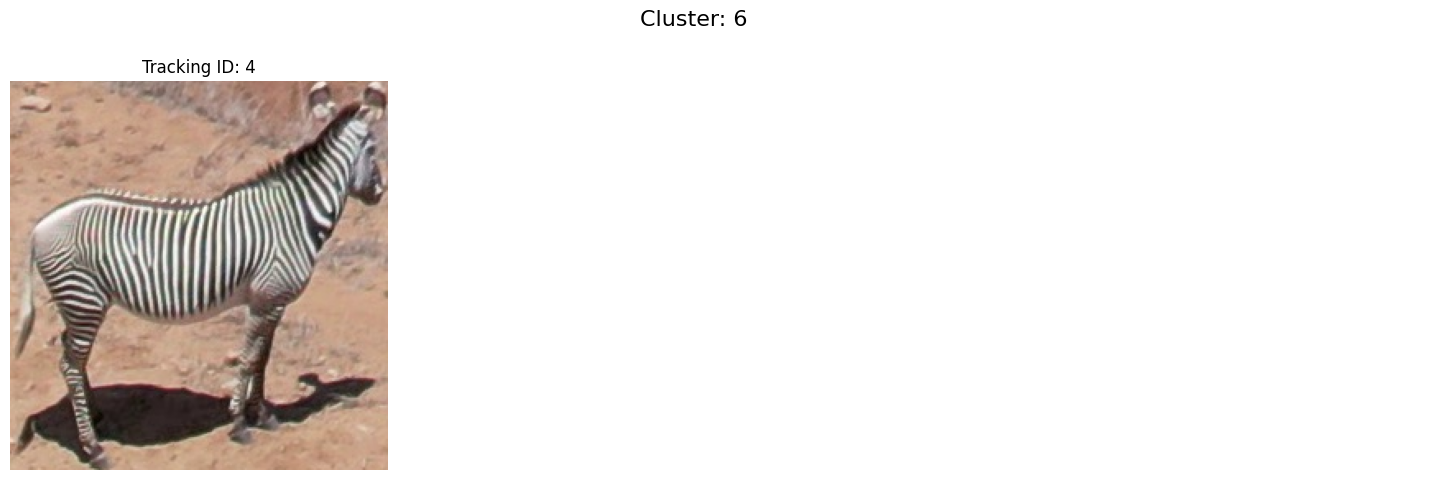

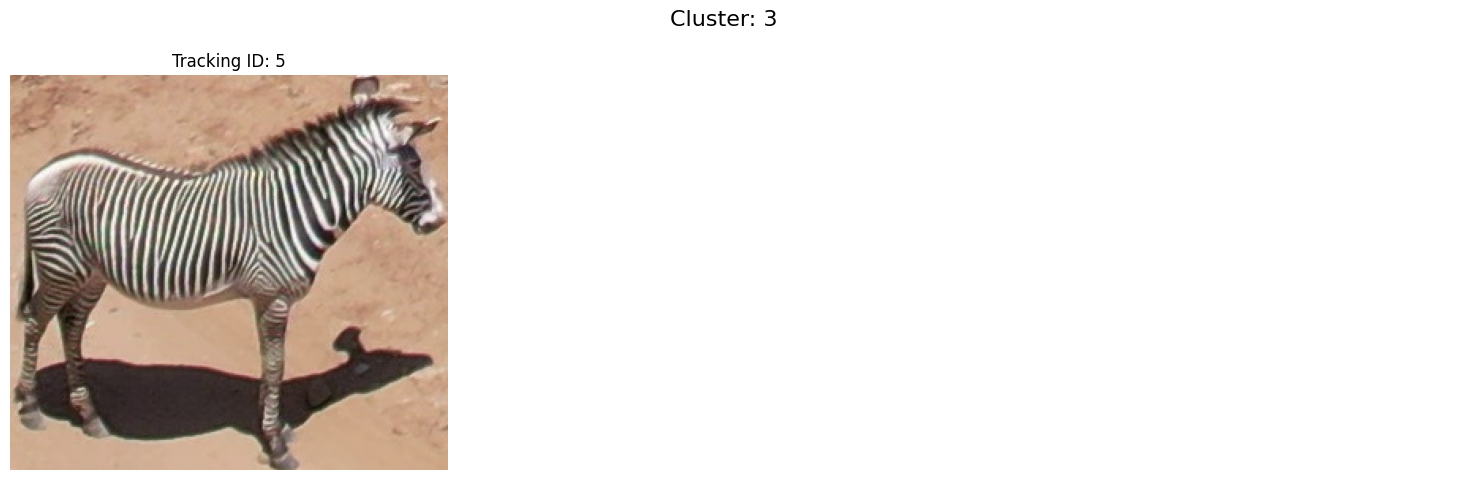

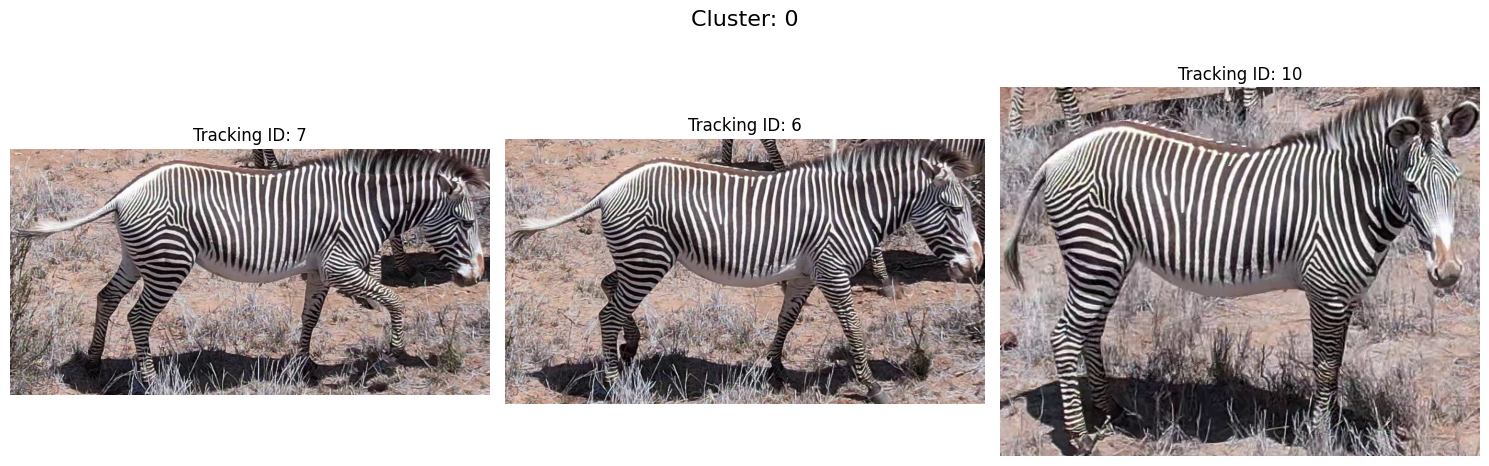

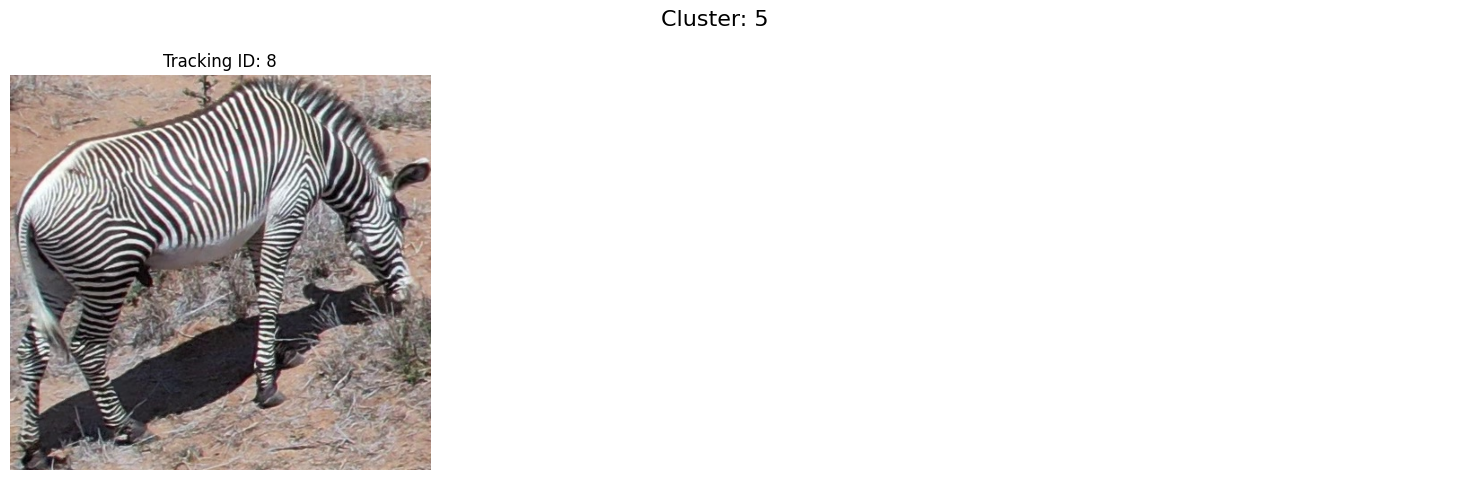

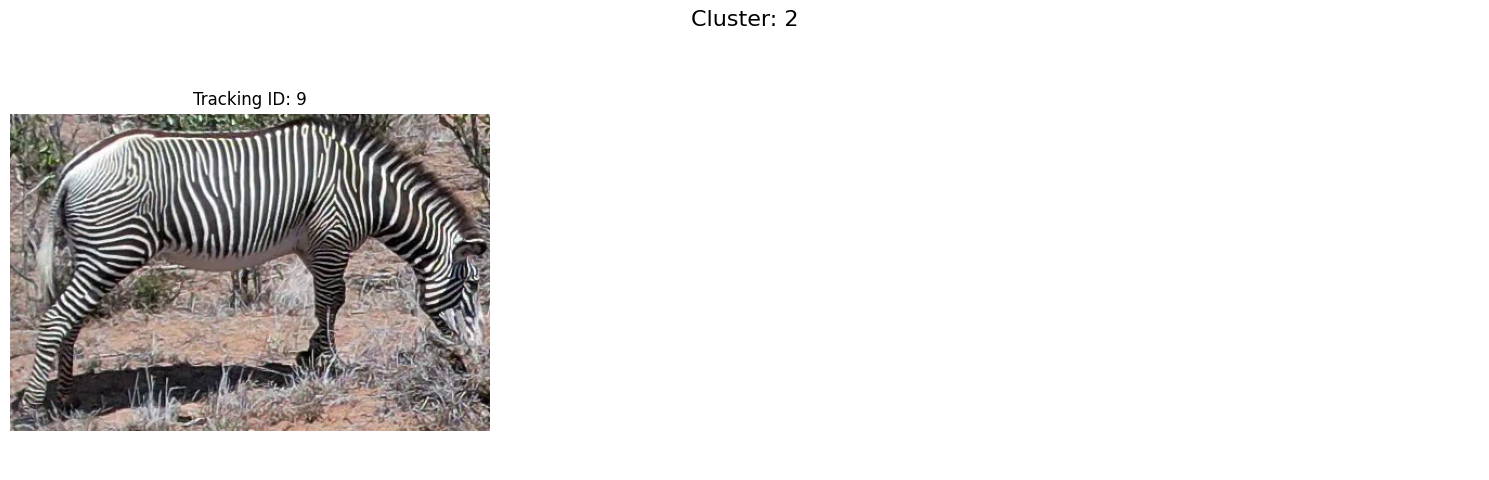

In [23]:
# Combine annotations
all_annotations = left_data["annotations"] + right_data["annotations"]
df = pd.DataFrame(all_annotations)

# Build image_uuid to image_path mapping
def get_image_path_map(data):
    return {img['uuid']: img['image_path'] for img in data['images']}

image_map = {
    **get_image_path_map(left_data),
    **get_image_path_map(right_data)
}

# Add image path to dataframe
df["image_path"] = df["image_uuid"].map(image_map)

# Compute summary per viewpoint
summary_df = (
    df.groupby("viewpoint")
    .agg(
        num_clusters=pd.NamedAgg(column="LCA_clustering_id", aggfunc=lambda x: len(set(x))),
        num_tracking_ids=pd.NamedAgg(column="tracking_id", aggfunc=lambda x: len(set(x)))
    )
    .reset_index()
)

print("Summary of clusters and tracking IDs per viewpoint:")
print(summary_df)

# Plot clusters with cropped bbox, 3 per row
def plot_clusters(df, cluster_col='LCA_clustering_id', max_per_row=3):
    unique_clusters = df[cluster_col].unique()
    
    for cluster_id in unique_clusters:
        cluster_df = df[df[cluster_col] == cluster_id]
        num_images = len(cluster_df)
        num_rows = (num_images + max_per_row - 1) // max_per_row

        fig, axes = plt.subplots(num_rows, max_per_row, figsize=(5 * max_per_row, 5 * num_rows))
        axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
        fig.suptitle(f"Cluster: {cluster_id}", fontsize=16)

        for i, (_, row) in enumerate(cluster_df.iterrows()):
            img_path = row["image_path"]
            bbox = row["bbox"]
            try:
                img = mpimg.imread(img_path)
                x, y, w, h = map(int, bbox)
                cropped = img[y:y+h, x:x+w]
                axes[i].imshow(cropped)
                axes[i].set_title(f"Tracking ID: {row['tracking_id']}")
                axes[i].axis("off")
            except Exception as e:
                axes[i].imshow(np.ones((100, 100, 3)))
                axes[i].set_title("Image not found")
                axes[i].axis("off")

        for j in range(i + 1, len(axes)):
            axes[j].axis("off")

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Plot clusters for both viewpoints
plot_clusters(df[df["viewpoint"] == "left"])
plot_clusters(df[df["viewpoint"] == "right"])